In [1]:

import gym
import numpy as np
import matplotlib.pyplot as plt

In [2]:

def run_episode(env, parameters):
    observation = env.reset()
    totalreward = 0
    counter = 0
    for _ in range(200):
        # env.render()
        action = 0 if np.matmul(parameters,observation) < 0 else 1
        observation, reward, done, info = env.step(action)
        totalreward += reward
        counter += 1
        if done:
            break
    return totalreward

def train(submit):
    env = gym.make('CartPole-v0')
    if submit:
        env.monitor.start('cartpole-hill/', force=True)

    episodes_per_update = 5
    noise_scaling = 0.1
    parameters = np.random.rand(4) * 2 - 1
    bestreward = 0
    counter = 0

    for _ in range(2000):
        counter += 1
        newparams = parameters + (np.random.rand(4) * 2 - 1)*noise_scaling
        # print newparams
        # reward = 0
        # for _ in xrange(episodes_per_update):
        #     run = run_episode(env,newparams)
        #     reward += run
        reward = run_episode(env,newparams)
        # print "reward %d best %d" % (reward, bestreward)
        if reward > bestreward:
            # print "update"
            bestreward = reward
            parameters = newparams
            if reward == 200:
                break

    if submit:
        for _ in xrange(100):
            run_episode(env,parameters)
        env.monitor.close()
    return counter


r = train(submit=False)
print (r)

2000


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:48: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.


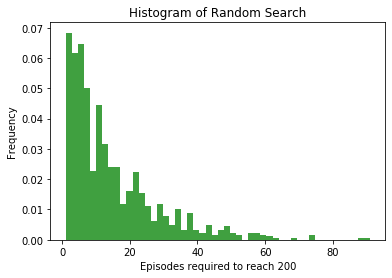

14.354


In [3]:
###### Random Search ######


def run_episode(env, parameters):
    observation = env.reset()
    totalreward = 0
    for _ in range(200):
        action = 0 if np.matmul(parameters,observation) < 0 else 1
        observation, reward, done, info = env.step(action)
        totalreward += reward
        if done:
            break
    return totalreward

def train(submit):
    env = gym.make('CartPole-v0')
    if submit:
        env.monitor.start('cartpole-experiments/', force=True)

    counter = 0
    bestparams = None
    bestreward = 0
    for _ in range(10000):
        counter += 1
        parameters = np.random.rand(4) * 2 - 1
        reward = run_episode(env,parameters)
        if reward > bestreward:
            bestreward = reward
            bestparams = parameters
            if reward == 200:
                break

    if submit:
        for _ in range(100):
            run_episode(env,bestparams)
        env.monitor.close()

    return counter

# train an agent to submit to openai gym
# train(submit=True)

# create graphs
results = []
for _ in range(1000):
    results.append(train(submit=False))

plt.hist(results,50,normed=1, facecolor='g', alpha=0.75)
plt.xlabel('Episodes required to reach 200')
plt.ylabel('Frequency')
plt.title('Histogram of Random Search')
plt.show()

print (np.sum(results) / 1000.0)